In [1]:
import gym
import gym_classics
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import deque
warnings.filterwarnings("ignore")

In [21]:
def sarsa(env, Q, params):
    tot_steps = 0
    done = False
    trunc = False
    state, info = env.reset()
    tot_reward = 0
    action = 0
    if np.random.binomial(1, params["epsilon"]) == 1:
        action = np.random.choice(range(4))
    else:
        values_ = Q[state, :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
    
    while not done and not trunc:
        nxt_state, reward, done, trunc, info = env.step(action)
        nxt_action = 0
        if np.random.binomial(1, params["epsilon"]) == 1:
            nxt_action = np.random.choice(range(4))
        else:
            values_ = Q[nxt_state, :]
            nxt_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

        target = params["gamma"] * Q[nxt_state, nxt_action]
        if done or trunc: target = 0
        td_error = reward + target - Q[state, action]
        Q[state, action] += params["alpha"] * td_error
        
        params["epsilon"] *= np.exp(-params["decay_rate"])
        tot_reward += reward
        state = nxt_state
    return tot_reward

In [27]:
params = {
    "alpha": 0.05,
    "gamma": 0.9,
    "epsilon": 1,
    "decay_rate": 0.01,
}

env = gym.make('FrozenLake-v1')
EPISODES = 100
ROUNDS = 1000
reward_list = np.zeros(EPISODES)
Q = np.zeros((16, 4))
for i in tqdm(range(EPISODES)):
    for _ in range(ROUNDS):
        reward_list[i] += sarsa(env, Q, params)

100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


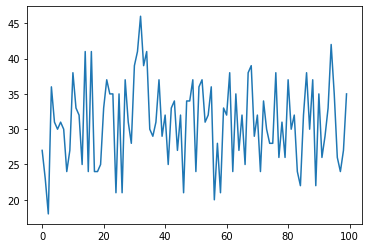

In [28]:
plt.plot(reward_list)
plt.show()